In [1]:
%load_ext autoreload

%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from datetime import datetime

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    plt.savefig(datetime.now().strftime("%Y/%m/%d %H:%M:%S") + ".pdf")
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)



['inputs', 'targets']
['inputs', 'targets']


In [2]:
from mlp.layers import *
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import *
from mlp.optimisers import Optimiser

PrintLayer fprop: (100, 1, 28, 28)
PrintLayer fprop: (100, 5, 24, 24)
PrintLayer fprop: (100, 5, 24, 24)
PrintLayer fprop: (100, 5, 12, 12)
PrintLayer fprop: (100, 720)
PrintLayer fprop: (100, 100)
PrintLayer fprop: (100, 100)
PrintLayer fprop: (100, 47)


A Jupyter Widget

A Jupyter Widget

PrintLayer bprop: (100, 47)
PrintLayer param: (100, 47)
PrintLayer bprop: (100, 100)
PrintLayer param: (100, 100)
PrintLayer bprop: (100, 100)
PrintLayer param: (100, 100)
PrintLayer bprop: (100, 720)
PrintLayer param: (100, 720)
PrintLayer bprop: (100, 5, 12, 12)
PrintLayer param: (100, 5, 12, 12)
PrintLayer bprop: (100, 5, 24, 24)
PrintLayer param: (100, 5, 24, 24)
PrintLayer bprop: (100, 5, 24, 24)
PrintLayer param: (100, 5, 24, 24)
PrintLayer bprop: (100, 1, 28, 28)
PrintLayer param: (100, 1, 28, 28)


Epoch 1: 287.0s to complete
    error(train)=3.85e+00, acc(train)=2.57e-02, error(valid)=3.85e+00, acc(valid)=2.53e-02


A Jupyter Widget

Epoch 2: 279.2s to complete
    error(train)=3.84e+00, acc(train)=2.93e-02, error(valid)=3.84e+00, acc(valid)=2.96e-02


A Jupyter Widget

Epoch 3: 274.1s to complete
    error(train)=3.82e+00, acc(train)=3.51e-02, error(valid)=3.82e+00, acc(valid)=3.59e-02


A Jupyter Widget

Epoch 4: 271.9s to complete
    error(train)=3.76e+00, acc(train)=5.51e-02, error(valid)=3.76e+00, acc(valid)=5.59e-02


A Jupyter Widget

Epoch 5: 278.4s to complete
    error(train)=3.57e+00, acc(train)=1.30e-01, error(valid)=3.58e+00, acc(valid)=1.32e-01


A Jupyter Widget

Epoch 6: 271.9s to complete
    error(train)=3.06e+00, acc(train)=2.50e-01, error(valid)=3.07e+00, acc(valid)=2.48e-01


A Jupyter Widget

Epoch 7: 274.4s to complete
    error(train)=2.29e+00, acc(train)=4.20e-01, error(valid)=2.28e+00, acc(valid)=4.23e-01


A Jupyter Widget

Epoch 8: 276.4s to complete
    error(train)=1.81e+00, acc(train)=5.16e-01, error(valid)=1.81e+00, acc(valid)=5.19e-01


A Jupyter Widget

Epoch 9: 273.6s to complete
    error(train)=1.59e+00, acc(train)=5.66e-01, error(valid)=1.58e+00, acc(valid)=5.68e-01


A Jupyter Widget

Epoch 10: 282.9s to complete
    error(train)=1.46e+00, acc(train)=5.94e-01, error(valid)=1.45e+00, acc(valid)=5.93e-01


A Jupyter Widget

Epoch 11: 271.1s to complete
    error(train)=1.38e+00, acc(train)=6.15e-01, error(valid)=1.38e+00, acc(valid)=6.15e-01


A Jupyter Widget

Epoch 12: 275.4s to complete
    error(train)=1.33e+00, acc(train)=6.28e-01, error(valid)=1.32e+00, acc(valid)=6.29e-01


A Jupyter Widget

Epoch 13: 271.8s to complete
    error(train)=1.28e+00, acc(train)=6.38e-01, error(valid)=1.28e+00, acc(valid)=6.38e-01


A Jupyter Widget

Epoch 14: 274.4s to complete
    error(train)=1.25e+00, acc(train)=6.47e-01, error(valid)=1.25e+00, acc(valid)=6.45e-01


A Jupyter Widget

Epoch 15: 270.8s to complete
    error(train)=1.22e+00, acc(train)=6.56e-01, error(valid)=1.22e+00, acc(valid)=6.54e-01


A Jupyter Widget

Epoch 16: 271.4s to complete
    error(train)=1.19e+00, acc(train)=6.64e-01, error(valid)=1.19e+00, acc(valid)=6.61e-01


A Jupyter Widget

Epoch 17: 274.6s to complete
    error(train)=1.17e+00, acc(train)=6.70e-01, error(valid)=1.17e+00, acc(valid)=6.68e-01


A Jupyter Widget

Epoch 18: 274.4s to complete
    error(train)=1.15e+00, acc(train)=6.74e-01, error(valid)=1.15e+00, acc(valid)=6.71e-01


A Jupyter Widget

Epoch 19: 276.4s to complete
    error(train)=1.13e+00, acc(train)=6.80e-01, error(valid)=1.13e+00, acc(valid)=6.78e-01


A Jupyter Widget

Epoch 20: 268.7s to complete
    error(train)=1.11e+00, acc(train)=6.82e-01, error(valid)=1.11e+00, acc(valid)=6.82e-01


A Jupyter Widget

Epoch 21: 269.7s to complete
    error(train)=1.09e+00, acc(train)=6.89e-01, error(valid)=1.10e+00, acc(valid)=6.86e-01


A Jupyter Widget

Epoch 22: 273.6s to complete
    error(train)=1.07e+00, acc(train)=6.94e-01, error(valid)=1.08e+00, acc(valid)=6.91e-01


A Jupyter Widget

Epoch 23: 274.2s to complete
    error(train)=1.06e+00, acc(train)=6.97e-01, error(valid)=1.06e+00, acc(valid)=6.95e-01


A Jupyter Widget

Epoch 24: 274.5s to complete
    error(train)=1.04e+00, acc(train)=7.01e-01, error(valid)=1.05e+00, acc(valid)=6.98e-01


A Jupyter Widget

Epoch 25: 276.5s to complete
    error(train)=1.03e+00, acc(train)=7.04e-01, error(valid)=1.04e+00, acc(valid)=7.03e-01


A Jupyter Widget

Epoch 26: 280.1s to complete
    error(train)=1.02e+00, acc(train)=7.07e-01, error(valid)=1.03e+00, acc(valid)=7.06e-01


A Jupyter Widget

Epoch 27: 280.0s to complete
    error(train)=1.00e+00, acc(train)=7.11e-01, error(valid)=1.01e+00, acc(valid)=7.09e-01


A Jupyter Widget

Epoch 28: 279.6s to complete
    error(train)=9.93e-01, acc(train)=7.13e-01, error(valid)=1.00e+00, acc(valid)=7.11e-01


A Jupyter Widget

Epoch 29: 284.4s to complete
    error(train)=9.78e-01, acc(train)=7.17e-01, error(valid)=9.90e-01, acc(valid)=7.13e-01


A Jupyter Widget

Epoch 30: 291.0s to complete
    error(train)=9.68e-01, acc(train)=7.20e-01, error(valid)=9.79e-01, acc(valid)=7.16e-01


A Jupyter Widget

Epoch 31: 334.2s to complete
    error(train)=9.57e-01, acc(train)=7.23e-01, error(valid)=9.70e-01, acc(valid)=7.16e-01


A Jupyter Widget

Epoch 32: 279.9s to complete
    error(train)=9.46e-01, acc(train)=7.26e-01, error(valid)=9.57e-01, acc(valid)=7.23e-01


A Jupyter Widget

Epoch 33: 280.1s to complete
    error(train)=9.36e-01, acc(train)=7.28e-01, error(valid)=9.49e-01, acc(valid)=7.25e-01


A Jupyter Widget

Epoch 34: 276.6s to complete
    error(train)=9.28e-01, acc(train)=7.29e-01, error(valid)=9.41e-01, acc(valid)=7.27e-01


A Jupyter Widget

Epoch 35: 276.0s to complete
    error(train)=9.16e-01, acc(train)=7.33e-01, error(valid)=9.29e-01, acc(valid)=7.31e-01


A Jupyter Widget

Epoch 36: 276.0s to complete
    error(train)=9.08e-01, acc(train)=7.36e-01, error(valid)=9.21e-01, acc(valid)=7.33e-01


A Jupyter Widget

Epoch 37: 276.8s to complete
    error(train)=8.99e-01, acc(train)=7.38e-01, error(valid)=9.12e-01, acc(valid)=7.33e-01


A Jupyter Widget

Epoch 38: 280.6s to complete
    error(train)=8.89e-01, acc(train)=7.40e-01, error(valid)=9.04e-01, acc(valid)=7.35e-01


A Jupyter Widget

Epoch 39: 274.1s to complete
    error(train)=8.81e-01, acc(train)=7.42e-01, error(valid)=8.95e-01, acc(valid)=7.37e-01


A Jupyter Widget

Epoch 40: 251.5s to complete
    error(train)=8.72e-01, acc(train)=7.45e-01, error(valid)=8.87e-01, acc(valid)=7.39e-01


A Jupyter Widget

Epoch 41: 230.3s to complete
    error(train)=8.65e-01, acc(train)=7.47e-01, error(valid)=8.79e-01, acc(valid)=7.40e-01


A Jupyter Widget

Epoch 42: 228.1s to complete
    error(train)=8.57e-01, acc(train)=7.48e-01, error(valid)=8.74e-01, acc(valid)=7.42e-01


A Jupyter Widget

Epoch 43: 225.0s to complete
    error(train)=8.48e-01, acc(train)=7.51e-01, error(valid)=8.64e-01, acc(valid)=7.44e-01


A Jupyter Widget

Epoch 44: 225.1s to complete
    error(train)=8.42e-01, acc(train)=7.52e-01, error(valid)=8.57e-01, acc(valid)=7.45e-01


A Jupyter Widget

Epoch 45: 224.9s to complete
    error(train)=8.37e-01, acc(train)=7.52e-01, error(valid)=8.53e-01, acc(valid)=7.46e-01


A Jupyter Widget

Epoch 46: 228.7s to complete
    error(train)=8.36e-01, acc(train)=7.53e-01, error(valid)=8.52e-01, acc(valid)=7.47e-01


A Jupyter Widget

Epoch 47: 225.5s to complete
    error(train)=8.23e-01, acc(train)=7.58e-01, error(valid)=8.40e-01, acc(valid)=7.50e-01


A Jupyter Widget

Epoch 48: 225.1s to complete
    error(train)=8.19e-01, acc(train)=7.58e-01, error(valid)=8.38e-01, acc(valid)=7.52e-01


A Jupyter Widget

Epoch 49: 233.9s to complete
    error(train)=8.09e-01, acc(train)=7.61e-01, error(valid)=8.26e-01, acc(valid)=7.56e-01


A Jupyter Widget

Epoch 50: 226.0s to complete
    error(train)=8.05e-01, acc(train)=7.62e-01, error(valid)=8.23e-01, acc(valid)=7.57e-01


A Jupyter Widget

Epoch 51: 227.3s to complete
    error(train)=7.99e-01, acc(train)=7.63e-01, error(valid)=8.17e-01, acc(valid)=7.57e-01


A Jupyter Widget

Epoch 52: 227.8s to complete
    error(train)=7.94e-01, acc(train)=7.63e-01, error(valid)=8.11e-01, acc(valid)=7.59e-01


A Jupyter Widget

Epoch 53: 224.6s to complete
    error(train)=7.86e-01, acc(train)=7.66e-01, error(valid)=8.04e-01, acc(valid)=7.61e-01


A Jupyter Widget

Epoch 54: 224.3s to complete
    error(train)=7.80e-01, acc(train)=7.68e-01, error(valid)=7.99e-01, acc(valid)=7.60e-01


A Jupyter Widget

Epoch 55: 227.8s to complete
    error(train)=7.77e-01, acc(train)=7.68e-01, error(valid)=7.96e-01, acc(valid)=7.63e-01


A Jupyter Widget

Epoch 56: 225.4s to complete
    error(train)=7.73e-01, acc(train)=7.69e-01, error(valid)=7.93e-01, acc(valid)=7.63e-01


A Jupyter Widget

Epoch 57: 224.9s to complete
    error(train)=7.68e-01, acc(train)=7.71e-01, error(valid)=7.89e-01, acc(valid)=7.64e-01


A Jupyter Widget

Epoch 58: 227.0s to complete
    error(train)=7.63e-01, acc(train)=7.72e-01, error(valid)=7.83e-01, acc(valid)=7.65e-01


A Jupyter Widget

Epoch 59: 226.6s to complete
    error(train)=7.57e-01, acc(train)=7.74e-01, error(valid)=7.77e-01, acc(valid)=7.67e-01


A Jupyter Widget

Epoch 60: 229.8s to complete
    error(train)=7.51e-01, acc(train)=7.74e-01, error(valid)=7.73e-01, acc(valid)=7.68e-01


A Jupyter Widget

Epoch 61: 225.5s to complete
    error(train)=7.48e-01, acc(train)=7.75e-01, error(valid)=7.70e-01, acc(valid)=7.69e-01


A Jupyter Widget

Epoch 62: 224.3s to complete
    error(train)=7.43e-01, acc(train)=7.77e-01, error(valid)=7.65e-01, acc(valid)=7.72e-01


A Jupyter Widget

Epoch 63: 226.1s to complete
    error(train)=7.38e-01, acc(train)=7.79e-01, error(valid)=7.60e-01, acc(valid)=7.72e-01


A Jupyter Widget

Epoch 64: 227.6s to complete
    error(train)=7.34e-01, acc(train)=7.79e-01, error(valid)=7.55e-01, acc(valid)=7.72e-01


A Jupyter Widget

Epoch 65: 227.3s to complete
    error(train)=7.31e-01, acc(train)=7.81e-01, error(valid)=7.54e-01, acc(valid)=7.74e-01


A Jupyter Widget

Epoch 66: 225.3s to complete
    error(train)=7.28e-01, acc(train)=7.81e-01, error(valid)=7.52e-01, acc(valid)=7.75e-01


A Jupyter Widget

Epoch 67: 224.7s to complete
    error(train)=7.24e-01, acc(train)=7.79e-01, error(valid)=7.48e-01, acc(valid)=7.71e-01


A Jupyter Widget

Epoch 68: 225.8s to complete
    error(train)=7.18e-01, acc(train)=7.82e-01, error(valid)=7.42e-01, acc(valid)=7.74e-01


A Jupyter Widget

Epoch 69: 228.6s to complete
    error(train)=7.21e-01, acc(train)=7.80e-01, error(valid)=7.45e-01, acc(valid)=7.73e-01


A Jupyter Widget

Epoch 70: 224.9s to complete
    error(train)=7.13e-01, acc(train)=7.84e-01, error(valid)=7.37e-01, acc(valid)=7.77e-01


A Jupyter Widget

Epoch 71: 224.7s to complete
    error(train)=7.09e-01, acc(train)=7.84e-01, error(valid)=7.33e-01, acc(valid)=7.78e-01


A Jupyter Widget

Epoch 72: 229.1s to complete
    error(train)=7.04e-01, acc(train)=7.86e-01, error(valid)=7.30e-01, acc(valid)=7.78e-01


A Jupyter Widget

Epoch 73: 228.2s to complete
    error(train)=7.01e-01, acc(train)=7.87e-01, error(valid)=7.26e-01, acc(valid)=7.79e-01


A Jupyter Widget

Epoch 74: 225.7s to complete
    error(train)=6.98e-01, acc(train)=7.88e-01, error(valid)=7.23e-01, acc(valid)=7.81e-01


A Jupyter Widget

Epoch 75: 227.8s to complete
    error(train)=6.93e-01, acc(train)=7.89e-01, error(valid)=7.20e-01, acc(valid)=7.82e-01


A Jupyter Widget

Epoch 76: 224.5s to complete
    error(train)=6.93e-01, acc(train)=7.89e-01, error(valid)=7.19e-01, acc(valid)=7.82e-01


A Jupyter Widget

Epoch 77: 225.3s to complete
    error(train)=6.89e-01, acc(train)=7.90e-01, error(valid)=7.16e-01, acc(valid)=7.81e-01


A Jupyter Widget

Epoch 78: 228.3s to complete
    error(train)=6.84e-01, acc(train)=7.92e-01, error(valid)=7.10e-01, acc(valid)=7.84e-01


A Jupyter Widget

Epoch 79: 225.5s to complete
    error(train)=6.83e-01, acc(train)=7.92e-01, error(valid)=7.11e-01, acc(valid)=7.83e-01


A Jupyter Widget

Epoch 80: 225.6s to complete
    error(train)=6.76e-01, acc(train)=7.94e-01, error(valid)=7.04e-01, acc(valid)=7.88e-01


A Jupyter Widget

Epoch 81: 227.0s to complete
    error(train)=6.76e-01, acc(train)=7.95e-01, error(valid)=7.02e-01, acc(valid)=7.85e-01


A Jupyter Widget

Epoch 82: 228.8s to complete
    error(train)=6.73e-01, acc(train)=7.94e-01, error(valid)=7.00e-01, acc(valid)=7.86e-01


A Jupyter Widget

Epoch 83: 229.8s to complete
    error(train)=6.74e-01, acc(train)=7.94e-01, error(valid)=7.02e-01, acc(valid)=7.84e-01


A Jupyter Widget

Epoch 84: 225.1s to complete
    error(train)=6.65e-01, acc(train)=7.97e-01, error(valid)=6.93e-01, acc(valid)=7.87e-01


A Jupyter Widget

Epoch 85: 224.7s to complete
    error(train)=6.66e-01, acc(train)=7.97e-01, error(valid)=6.95e-01, acc(valid)=7.88e-01


A Jupyter Widget

Epoch 86: 226.0s to complete
    error(train)=6.62e-01, acc(train)=7.97e-01, error(valid)=6.91e-01, acc(valid)=7.87e-01


A Jupyter Widget

Epoch 87: 229.6s to complete
    error(train)=6.57e-01, acc(train)=7.99e-01, error(valid)=6.86e-01, acc(valid)=7.91e-01


A Jupyter Widget

Epoch 88: 224.7s to complete
    error(train)=6.55e-01, acc(train)=7.99e-01, error(valid)=6.85e-01, acc(valid)=7.91e-01


A Jupyter Widget

Epoch 89: 225.7s to complete
    error(train)=6.52e-01, acc(train)=8.00e-01, error(valid)=6.82e-01, acc(valid)=7.92e-01


A Jupyter Widget

Epoch 90: 224.2s to complete
    error(train)=6.51e-01, acc(train)=8.00e-01, error(valid)=6.82e-01, acc(valid)=7.93e-01


A Jupyter Widget

Epoch 91: 227.3s to complete
    error(train)=6.48e-01, acc(train)=8.02e-01, error(valid)=6.78e-01, acc(valid)=7.91e-01


A Jupyter Widget

Epoch 92: 225.9s to complete
    error(train)=6.47e-01, acc(train)=8.02e-01, error(valid)=6.77e-01, acc(valid)=7.92e-01


A Jupyter Widget

Epoch 93: 225.3s to complete
    error(train)=6.45e-01, acc(train)=8.02e-01, error(valid)=6.76e-01, acc(valid)=7.93e-01


A Jupyter Widget

Epoch 94: 224.6s to complete
    error(train)=6.41e-01, acc(train)=8.03e-01, error(valid)=6.70e-01, acc(valid)=7.96e-01


A Jupyter Widget

Epoch 95: 224.9s to complete
    error(train)=6.40e-01, acc(train)=8.04e-01, error(valid)=6.70e-01, acc(valid)=7.92e-01


A Jupyter Widget

Epoch 96: 228.1s to complete
    error(train)=6.35e-01, acc(train)=8.05e-01, error(valid)=6.67e-01, acc(valid)=7.94e-01


A Jupyter Widget

Epoch 97: 225.6s to complete
    error(train)=6.34e-01, acc(train)=8.04e-01, error(valid)=6.67e-01, acc(valid)=7.95e-01


A Jupyter Widget

Epoch 98: 227.1s to complete
    error(train)=6.31e-01, acc(train)=8.07e-01, error(valid)=6.63e-01, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 99: 226.2s to complete
    error(train)=6.30e-01, acc(train)=8.06e-01, error(valid)=6.62e-01, acc(valid)=7.95e-01


A Jupyter Widget

Epoch 100: 226.9s to complete
    error(train)=6.25e-01, acc(train)=8.07e-01, error(valid)=6.58e-01, acc(valid)=7.97e-01


FileNotFoundError: [Errno 2] No such file or directory: '2017/12/03 08:06:53.pdf'

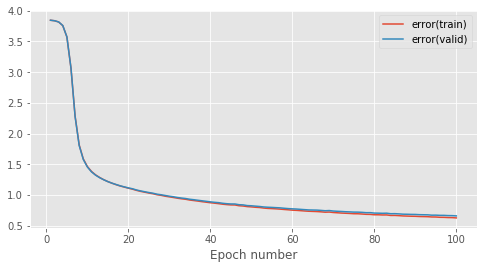

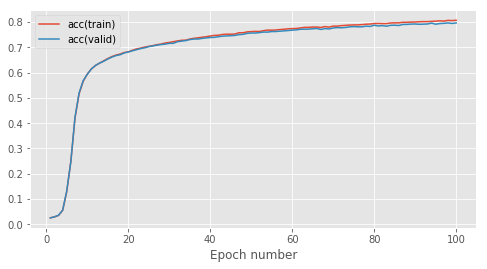

In [3]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import *
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import *
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
kernel_dim = 5

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    ReshapeLayer((1,28,28,)) , #(1, 28, 28)
    PrintLayer(),
    ConvolutionalLayer(1, 5, 28, 28, 5, 5) , # (5, 24, 24)
    PrintLayer(),
    ReluLayer(), # (5, 24, 24)
    PrintLayer(),
    MaxPoolingLayer() ,
    PrintLayer(),
    ReshapeLayer((5*12*12,)),
    PrintLayer(),
    AffineLayer(5*12*12, hidden_dim, weights_init, biases_init), 
    PrintLayer(),
    ReluLayer(),
    PrintLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init), # 47
    PrintLayer()
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

PrintLayer fprop: (100, 1, 28, 28)
PrintLayer fprop: (100, 5, 24, 24)
PrintLayer fprop: (100, 5, 24, 24)
PrintLayer fprop: (100, 5, 12, 12)
PrintLayer fprop: (100, 720)
PrintLayer fprop: (100, 50)
PrintLayer fprop: (100, 50)
PrintLayer fprop: (100, 47)


A Jupyter Widget

A Jupyter Widget

PrintLayer bprop: (100, 47)
PrintLayer param: (100, 47)
PrintLayer bprop: (100, 50)
PrintLayer param: (100, 50)
PrintLayer bprop: (100, 50)
PrintLayer param: (100, 50)
PrintLayer bprop: (100, 720)
PrintLayer param: (100, 720)
PrintLayer bprop: (100, 5, 12, 12)
PrintLayer param: (100, 5, 12, 12)
PrintLayer bprop: (100, 5, 24, 24)
PrintLayer param: (100, 5, 24, 24)
PrintLayer bprop: (100, 5, 24, 24)
PrintLayer param: (100, 5, 24, 24)
PrintLayer bprop: (100, 1, 28, 28)
PrintLayer param: (100, 1, 28, 28)


Epoch 1: 269.5s to complete
    error(train)=3.85e+00, acc(train)=2.05e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


A Jupyter Widget

Epoch 2: 255.0s to complete
    error(train)=3.84e+00, acc(train)=2.18e-02, error(valid)=3.84e+00, acc(valid)=2.30e-02


A Jupyter Widget

Epoch 3: 254.9s to complete
    error(train)=3.83e+00, acc(train)=2.65e-02, error(valid)=3.83e+00, acc(valid)=2.67e-02


A Jupyter Widget

Epoch 4: 253.2s to complete
    error(train)=3.82e+00, acc(train)=3.22e-02, error(valid)=3.82e+00, acc(valid)=3.11e-02


A Jupyter Widget

Epoch 5: 253.2s to complete
    error(train)=3.77e+00, acc(train)=4.33e-02, error(valid)=3.77e+00, acc(valid)=4.01e-02


A Jupyter Widget

Epoch 6: 249.5s to complete
    error(train)=3.66e+00, acc(train)=8.20e-02, error(valid)=3.66e+00, acc(valid)=7.63e-02


A Jupyter Widget

Epoch 7: 262.7s to complete
    error(train)=3.42e+00, acc(train)=1.49e-01, error(valid)=3.43e+00, acc(valid)=1.44e-01


A Jupyter Widget

Epoch 8: 262.6s to complete
    error(train)=2.97e+00, acc(train)=2.43e-01, error(valid)=2.98e+00, acc(valid)=2.39e-01


A Jupyter Widget

Epoch 9: 250.6s to complete
    error(train)=2.40e+00, acc(train)=3.77e-01, error(valid)=2.40e+00, acc(valid)=3.75e-01


A Jupyter Widget

Epoch 10: 258.2s to complete
    error(train)=2.01e+00, acc(train)=4.66e-01, error(valid)=2.01e+00, acc(valid)=4.66e-01


A Jupyter Widget

Epoch 11: 252.9s to complete
    error(train)=1.77e+00, acc(train)=5.19e-01, error(valid)=1.77e+00, acc(valid)=5.19e-01


A Jupyter Widget

Epoch 12: 250.0s to complete
    error(train)=1.63e+00, acc(train)=5.56e-01, error(valid)=1.62e+00, acc(valid)=5.56e-01


A Jupyter Widget

Epoch 13: 249.2s to complete
    error(train)=1.53e+00, acc(train)=5.79e-01, error(valid)=1.53e+00, acc(valid)=5.77e-01


A Jupyter Widget

Epoch 14: 257.9s to complete
    error(train)=1.46e+00, acc(train)=5.95e-01, error(valid)=1.46e+00, acc(valid)=5.91e-01


A Jupyter Widget

Epoch 15: 253.5s to complete
    error(train)=1.41e+00, acc(train)=6.09e-01, error(valid)=1.41e+00, acc(valid)=6.06e-01


A Jupyter Widget

Epoch 16: 252.7s to complete
    error(train)=1.37e+00, acc(train)=6.19e-01, error(valid)=1.37e+00, acc(valid)=6.17e-01


A Jupyter Widget

Epoch 17: 259.4s to complete
    error(train)=1.34e+00, acc(train)=6.28e-01, error(valid)=1.34e+00, acc(valid)=6.26e-01


A Jupyter Widget

Epoch 18: 246.8s to complete
    error(train)=1.31e+00, acc(train)=6.34e-01, error(valid)=1.31e+00, acc(valid)=6.31e-01


A Jupyter Widget

Epoch 19: 247.7s to complete
    error(train)=1.29e+00, acc(train)=6.40e-01, error(valid)=1.29e+00, acc(valid)=6.37e-01


A Jupyter Widget

Epoch 20: 252.0s to complete
    error(train)=1.27e+00, acc(train)=6.45e-01, error(valid)=1.27e+00, acc(valid)=6.43e-01


A Jupyter Widget

Epoch 21: 249.2s to complete
    error(train)=1.26e+00, acc(train)=6.49e-01, error(valid)=1.25e+00, acc(valid)=6.44e-01


A Jupyter Widget

Epoch 22: 247.6s to complete
    error(train)=1.24e+00, acc(train)=6.54e-01, error(valid)=1.24e+00, acc(valid)=6.52e-01


A Jupyter Widget

Epoch 23: 251.8s to complete
    error(train)=1.22e+00, acc(train)=6.59e-01, error(valid)=1.22e+00, acc(valid)=6.57e-01


A Jupyter Widget

Epoch 24: 445.4s to complete
    error(train)=1.21e+00, acc(train)=6.63e-01, error(valid)=1.21e+00, acc(valid)=6.62e-01


A Jupyter Widget

Epoch 25: 559.2s to complete
    error(train)=1.20e+00, acc(train)=6.65e-01, error(valid)=1.20e+00, acc(valid)=6.63e-01


A Jupyter Widget

Epoch 26: 391.9s to complete
    error(train)=1.19e+00, acc(train)=6.66e-01, error(valid)=1.19e+00, acc(valid)=6.64e-01


A Jupyter Widget

Epoch 27: 661.2s to complete
    error(train)=1.18e+00, acc(train)=6.70e-01, error(valid)=1.18e+00, acc(valid)=6.66e-01


A Jupyter Widget

Epoch 28: 435.3s to complete
    error(train)=1.17e+00, acc(train)=6.74e-01, error(valid)=1.17e+00, acc(valid)=6.72e-01


A Jupyter Widget

Epoch 29: 331.9s to complete
    error(train)=1.16e+00, acc(train)=6.77e-01, error(valid)=1.16e+00, acc(valid)=6.73e-01


A Jupyter Widget

Epoch 30: 285.4s to complete
    error(train)=1.15e+00, acc(train)=6.78e-01, error(valid)=1.15e+00, acc(valid)=6.76e-01


A Jupyter Widget

Epoch 31: 249.8s to complete
    error(train)=1.14e+00, acc(train)=6.81e-01, error(valid)=1.14e+00, acc(valid)=6.77e-01


A Jupyter Widget

Epoch 32: 250.3s to complete
    error(train)=1.13e+00, acc(train)=6.82e-01, error(valid)=1.13e+00, acc(valid)=6.81e-01


A Jupyter Widget

Epoch 33: 249.3s to complete
    error(train)=1.12e+00, acc(train)=6.86e-01, error(valid)=1.12e+00, acc(valid)=6.85e-01


A Jupyter Widget

Epoch 34: 249.4s to complete
    error(train)=1.11e+00, acc(train)=6.87e-01, error(valid)=1.12e+00, acc(valid)=6.82e-01


A Jupyter Widget

Epoch 35: 249.8s to complete
    error(train)=1.11e+00, acc(train)=6.88e-01, error(valid)=1.11e+00, acc(valid)=6.85e-01


A Jupyter Widget

Epoch 36: 250.2s to complete
    error(train)=1.10e+00, acc(train)=6.91e-01, error(valid)=1.10e+00, acc(valid)=6.89e-01


A Jupyter Widget

Epoch 37: 250.7s to complete
    error(train)=1.09e+00, acc(train)=6.94e-01, error(valid)=1.09e+00, acc(valid)=6.91e-01


A Jupyter Widget

Epoch 38: 252.3s to complete
    error(train)=1.08e+00, acc(train)=6.95e-01, error(valid)=1.09e+00, acc(valid)=6.90e-01


A Jupyter Widget

Epoch 39: 249.5s to complete
    error(train)=1.08e+00, acc(train)=6.96e-01, error(valid)=1.08e+00, acc(valid)=6.92e-01


A Jupyter Widget

Epoch 40: 253.1s to complete
    error(train)=1.07e+00, acc(train)=6.98e-01, error(valid)=1.07e+00, acc(valid)=6.96e-01


A Jupyter Widget

Epoch 41: 250.9s to complete
    error(train)=1.06e+00, acc(train)=7.00e-01, error(valid)=1.06e+00, acc(valid)=6.97e-01


A Jupyter Widget

Epoch 42: 250.0s to complete
    error(train)=1.05e+00, acc(train)=7.02e-01, error(valid)=1.06e+00, acc(valid)=6.98e-01


A Jupyter Widget

Epoch 43: 250.6s to complete
    error(train)=1.05e+00, acc(train)=7.03e-01, error(valid)=1.05e+00, acc(valid)=7.00e-01


A Jupyter Widget

Epoch 44: 250.5s to complete
    error(train)=1.04e+00, acc(train)=7.05e-01, error(valid)=1.04e+00, acc(valid)=7.02e-01


A Jupyter Widget

Epoch 45: 249.3s to complete
    error(train)=1.03e+00, acc(train)=7.07e-01, error(valid)=1.04e+00, acc(valid)=7.04e-01


A Jupyter Widget

Epoch 46: 249.1s to complete
    error(train)=1.02e+00, acc(train)=7.09e-01, error(valid)=1.03e+00, acc(valid)=7.06e-01


A Jupyter Widget

Epoch 47: 251.0s to complete
    error(train)=1.02e+00, acc(train)=7.10e-01, error(valid)=1.03e+00, acc(valid)=7.07e-01


A Jupyter Widget

Epoch 48: 249.8s to complete
    error(train)=1.01e+00, acc(train)=7.13e-01, error(valid)=1.02e+00, acc(valid)=7.09e-01


A Jupyter Widget

Epoch 49: 249.3s to complete
    error(train)=1.01e+00, acc(train)=7.14e-01, error(valid)=1.01e+00, acc(valid)=7.08e-01


A Jupyter Widget

Epoch 50: 249.5s to complete
    error(train)=1.00e+00, acc(train)=7.16e-01, error(valid)=1.01e+00, acc(valid)=7.10e-01


FileNotFoundError: [Errno 2] No such file or directory: '2017/12/03 15:19:39.pdf'

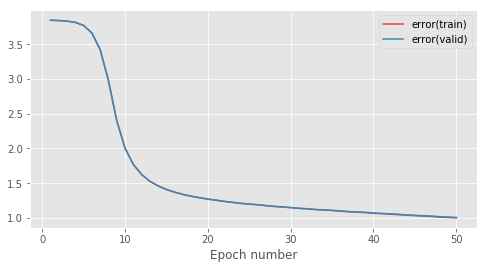

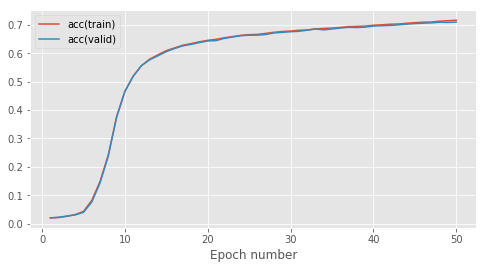

In [5]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import *
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import *
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.001
num_epochs = 50
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 50
kernel_dim = 5

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    ReshapeLayer((1,28,28,)) , #(1, 28, 28)
    PrintLayer(),
    ConvolutionalLayer(1, 5, 28, 28, 5, 5) , # (5, 24, 24)
    PrintLayer(),
    ReluLayer(), # (5, 24, 24)
    PrintLayer(),
    MaxPoolingLayer() ,
    PrintLayer(),
    ReshapeLayer((5*12*12,)),
    PrintLayer(),
    AffineLayer(5*12*12, hidden_dim, weights_init, biases_init), 
    PrintLayer(),
    ReluLayer(),
    PrintLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init), # 47
    PrintLayer()
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)